In [5]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/debasisdotcom/name-entity-recognition-ner-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mostafa1221
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/debasisdotcom/name-entity-recognition-ner-dataset


100%|██████████| 3.17M/3.17M [00:00<00:00, 659MB/s]

In [1]:
# Install compatible versions of PyTorch and TorchText
!pip install torchtext==0.16.0  #torch==2.1.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 5.1 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 97.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 79.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 3.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 4.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 13.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader ,Dataset
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix 

In [4]:
torch.__version__

'2.1.0+cu121'

In [5]:
df=pd.read_csv("/kaggle/input/name-entity-recognition-ner-dataset/NER dataset.csv",encoding='unicode_escape')

In [6]:
df

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O
...,...,...,...,...
1048570,NaN,they,PRP,O
1048571,NaN,responded,VBD,O
1048572,NaN,to,TO,O
1048573,NaN,the,DT,O


In [7]:
df["Tag"].value_counts()

Tag
O        887908
B-geo     37644
B-tim     20333
B-org     20143
I-per     17251
B-per     16990
I-org     16784
B-gpe     15870
I-geo      7414
I-tim      6528
B-art       402
B-eve       308
I-art       297
I-eve       253
B-nat       201
I-gpe       198
I-nat        51
Name: count, dtype: int64

In [8]:
def prepared_tag(t):
    if t in ["B-art","B-eve","I-art","I-eve","B-nat","I-gpe","I-nat"]:
        return "O"
    else:
        return t

In [9]:
df["Tag"]=df["Tag"].apply(prepared_tag)

In [10]:
df["Tag"].value_counts()

Tag
O        889618
B-geo     37644
B-tim     20333
B-org     20143
I-per     17251
B-per     16990
I-org     16784
B-gpe     15870
I-geo      7414
I-tim      6528
Name: count, dtype: int64

In [11]:
for i in df["Tag"].unique():
    print(i)

O
B-geo
B-gpe
B-per
I-geo
B-org
I-org
B-tim
I-per
I-tim


In [12]:
lapels ={l:i for i,l in enumerate(df["Tag"].unique())}
lapels

{'O': 0,
 'B-geo': 1,
 'B-gpe': 2,
 'B-per': 3,
 'I-geo': 4,
 'B-org': 5,
 'I-org': 6,
 'B-tim': 7,
 'I-per': 8,
 'I-tim': 9}

In [13]:
def xx(w):
    for l,i in lapels.items():
        if l==w:
            return i
            break
df["enc_lapels"] =df["Tag"].apply(xx)
df[10:20]

,Sentence #,Word,POS,Tag,enc_lapels
10,NaN,war,NN,O,0
11,NaN,in,IN,O,0
12,NaN,Iraq,NNP,B-geo,1
13,NaN,and,CC,O,0
14,NaN,demand,VB,O,0
15,NaN,the,DT,O,0
16,NaN,withdrawal,NN,O,0
17,NaN,of,IN,O,0
18,NaN,British,JJ,B-gpe,2
19,NaN,troops,NNS,O,0


In [14]:
df=df.ffill()
df

,Sentence #,Word,POS,Tag,enc_lapels
0,Sentence: 1,Thousands,NNS,O,0
1,Sentence: 1,of,IN,O,0
2,Sentence: 1,demonstrators,NNS,O,0
3,Sentence: 1,have,VBP,O,0
4,Sentence: 1,marched,VBN,O,0
...,...,...,...,...,...
1048570,Sentence: 47959,they,PRP,O,0
1048571,Sentence: 47959,responded,VBD,O,0
1048572,Sentence: 47959,to,TO,O,0
1048573,Sentence: 47959,the,DT,O,0


In [15]:
df["Sentence #"].nunique()

47959

In [16]:
def SentenceBuilder(x):
    iterator = zip(x["Word"].values.tolist(),
                   x["enc_lapels"].values.tolist())
    return [(word, tag) for word, tag in iterator]

In [17]:
sentences = df.groupby("Sentence #").apply(SentenceBuilder, include_groups=False).tolist()

print(sentences[0])

[('Thousands', 0), ('of', 0), ('demonstrators', 0), ('have', 0), ('marched', 0), ('through', 0), ('London', 1), ('to', 0), ('protest', 0), ('the', 0), ('war', 0), ('in', 0), ('Iraq', 1), ('and', 0), ('demand', 0), ('the', 0), ('withdrawal', 0), ('of', 0), ('British', 2), ('troops', 0), ('from', 0), ('that', 0), ('country', 0), ('.', 0)]


In [18]:

all_s=[]
all_l=[]
for ss in sentences:
    s=[]
    t=[]
    for w,l in ss :
        t.append(l)
        s.append(w)
    all_s.append(s)
    all_l.append(t)

print(all_s[0],all_l[0])

['Thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'London', 'to', 'protest', 'the', 'war', 'in', 'Iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'British', 'troops', 'from', 'that', 'country', '.'] [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]


In [19]:
print(len(all_s),len(all_l))

47959 47959


In [2]:
from torchtext.vocab import build_vocab_from_iterator

In [20]:
special_tokens=["<PAD>","<UNK>"]

In [21]:
our_vocab=build_vocab_from_iterator(all_s,specials=special_tokens,max_tokens=4000)

In [22]:
len(our_vocab)

4000

In [23]:
our_vocab.set_default_index(our_vocab[special_tokens[1]])

In [24]:
our_vocab[special_tokens[1]]

1

In [25]:
idss=our_vocab.lookup_indices(all_s[44])
print(idss)

[10, 86, 20, 3506, 12, 8, 2352, 7, 153, 348, 4, 176, 1, 1, 20, 7, 1, 6, 8, 3993, 75, 4, 90, 36, 20, 580, 1038, 7, 8, 1, 1, 24, 2, 1327, 3]


In [26]:
tt=our_vocab.lookup_tokens(idss)
print(tt)

['The', 'group', 'was', 'waiting', 'for', 'a', 'flight', 'to', 'South', 'Africa', ',', 'where', '<UNK>', '<UNK>', 'was', 'to', '<UNK>', 'in', 'a', 'concert', 'Thursday', ',', 'when', 'it', 'was', 'denied', 'access', 'to', 'a', '<UNK>', '<UNK>', 'at', 'the', 'airport', '.']


In [27]:
def pad_seq(s,m,p_t):
  if len(s)>=m:
    return s[:m]
  else:
    return s + [p_t] * (m-len(s))

def pad_t(m,t):
    if m >=len(t):
        return t + [-100] * (m-len(t))
    else:
        return t[:m]



In [28]:
print(pad_seq([3,4,5],10,0))
print(pad_t(10,[0,1,2]))

[3, 4, 5, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 2, -100, -100, -100, -100, -100, -100, -100]


In [29]:
df_d=pd.DataFrame({"tokens_s":all_s,"labels_enc":all_l})
df_d

,tokens_s,labels_enc
0,"[Thousands, of, demonstrators, have, marched, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ..."
1,"[Iranian, officials, say, they, expect, to, ge...","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[Helicopter, gunships, Saturday, pounded, mili...","[0, 0, 7, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 5, ..."
3,"[They, left, after, a, tense, hour-long, stand...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,"[U.N., relief, coordinator, Jan, Egeland, said...","[1, 0, 0, 3, 8, 0, 7, 0, 1, 0, 2, 0, 2, 0, 0, ..."
...,...,...
47954,"[Opposition, leader, Mir, Hossein, Mousavi, ha...","[0, 0, 0, 3, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
47955,"[On, Thursday, ,, Iranian, state, media, publi...","[0, 7, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 5, 6, 0, ..."
47956,"[Following, Iran, 's, disputed, June, 12, elec...","[0, 1, 0, 0, 7, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
47957,"[Since, then, ,, authorities, have, held, publ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [30]:
len(df_d["labels_enc"][1]) , len(df_d["tokens_s"][1])

(25, 25)

<Axes: >

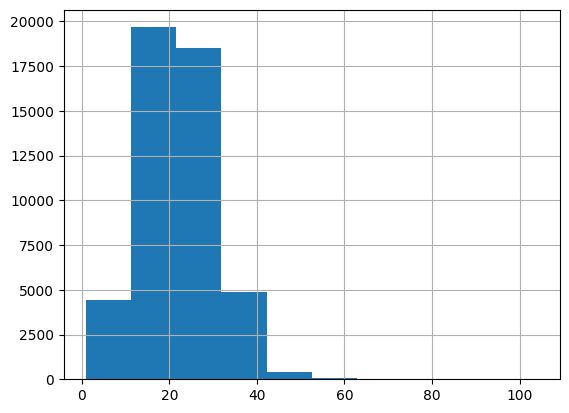

In [31]:
df_d["tokens_s"].map(len).hist()

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(df_d["tokens_s"],df_d["labels_enc"],test_size=0.2,shuffle=True,random_state=42)

In [34]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((38367,), (9592,), (38367,), (9592,))

In [35]:
class OurData(Dataset):

    def __init__(self,s,l,vocab):
        self.s =s
        self.l=l
        self.vocab=vocab

    def __len__(self):
        return len(self.s)

    def __getitem__(self,i):

        x=pad_seq(self.s.values[i],100,"<PAD>")
        y=pad_t(100,self.l.values[i])
        input=torch.tensor(self.vocab.lookup_indices(x), dtype=torch.long)
        target=torch.tensor(y, dtype=torch.long)

        return input,target



In [36]:
x_train.values[888]

['Medals',
 'will',
 'be',
 'awarded',
 'in',
 'eight',
 'Olympic',
 'events',
 'Sunday',
 ',',
 'including',
 'the',
 'highly',
 'anticipated',
 'men',
 "'s",
 'Alpine',
 'skiing',
 'downhill',
 'race',
 '.']

In [37]:
our_train_data_set=OurData(x_train,y_train,our_vocab)
our_test_data_set=OurData(x_test,y_test,our_vocab)

In [38]:
our_train_data_loader=DataLoader(our_train_data_set,batch_size=32,shuffle=True)
our_test_data_loader=DataLoader(our_test_data_set,batch_size=32,shuffle=False)

In [39]:
for i,t in our_train_data_loader :
  print(i.shape)
  print(t.shape)
  break

torch.Size([32, 100])
torch.Size([32, 100])


In [40]:
len(our_train_data_loader)

1199

In [41]:
len(our_train_data_set)

38367

In [42]:
len(lapels),len(our_vocab)

(10, 4000)

In [43]:
class OurLSTM(nn.Module):
  def __init__(self):

    super(OurLSTM,self).__init__()

    
    self.embed=nn.Embedding(len(our_vocab),100,0)
    self.lstm=nn.LSTM(100,64,num_layers=4,batch_first=True,bidirectional=True)
    self.liner1=nn.Linear(64*2,32)
    self.output=nn.Linear(32,10)
    self.drop_out=nn.Dropout(.25)
    self.relu=nn.ReLU()

  def forward (self,x):
    x=self.embed(x)
    out,_=self.lstm(x)
    x=self.liner1(out)
    x=self.relu(x)
    x=self.drop_out(x)
    x=self.output(x)

    return x

In [46]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [47]:
our_lstm_model=OurLSTM().to(device)
our_lstm_model(torch.randint(0,100,(32,100)).to(device)).shape

torch.Size([32, 100, 10])

In [48]:
our_loss=nn.CrossEntropyLoss(ignore_index=-100)
our_optimizer =torch.optim.AdamW(our_lstm_model.parameters(),lr=.0001)

In [49]:
def our_accuracy(t,y): 
  t=t.flatten()  #32*60  >>1920
  y=torch.argmax(torch.softmax(y,dim=-1),dim=-1).squeeze().flatten() #32*60*10 >> 32*60*1 >> 32*60 >>1920
  mask = (t != -100)
  correct = (t==y)*mask
  correct_count = correct.sum().item()
  total_count = mask.sum().item()
  return correct_count , total_count   

# [1,1,1,1,0,0,0,-100,-100]  [1,1,1,1,1,1,1,0,0]  [1,0,1,1,1,0,1,-100,-100]
  

In [50]:
print(our_accuracy(torch.ones((32,60)),torch.rand((32,60,10))))

(189, 1920)


In [51]:
def our_train(epochs=100,our_model=our_lstm_model):

    train_loss_l=[]
    test_loss_l=[]
    train_accuracy_l =[]
    test_accuracy_l =[]
    
    for epoch in range(epochs): 
    
    
      train_loss_v=0.0
      
      test_loss_v=0.0
      

      train_correct = 0.0
      train_total = 0.0
        
      test_correct = 0.0
      test_total = 0.0
      
    
      for x_train_batch , y_train_batch in our_train_data_loader : 
          
        x_train_batch=x_train_batch.to(device)
        y_train_batch=y_train_batch.to(device)
    
        our_model.train()
    
        y_train_pred=our_model(x_train_batch)
    
        train_loss=our_loss(y_train_pred.view(-1,10),y_train_batch.view(-1))
    
        our_optimizer.zero_grad()
        train_loss.backward()
        our_optimizer.step()
          
        train_loss_v +=train_loss.item()

        correct_train, total_train = our_accuracy(y_train_batch, y_train_pred)
        train_correct += correct_train
        train_total += total_train
    
      with torch.inference_mode(): 
          
        our_model.eval()
          
        for x_test_batch , y_test_batch in our_test_data_loader : 
            x_test_batch=x_test_batch.to(device)
            y_test_batch=y_test_batch.to(device)
    
            y_test_pred=our_model(x_test_batch)
    
            test_loss=our_loss(y_test_pred.view(-1,10),y_test_batch.view(-1))
    
            test_loss_v +=test_loss.item()

            correct_test, total_test = our_accuracy(y_test_batch, y_test_pred)
            test_correct += correct_test
            test_total += total_test

        
      train_acc = train_correct / train_total if train_total > 0 else 0
      test_acc = test_correct / test_total if test_total > 0 else 0 
    
      train_loss_l.append(train_loss_v/our_train_data_set.__len__())
      test_loss_l.append(test_loss_v/our_test_data_set.__len__())
    
      train_accuracy_l.append(train_acc)
      test_accuracy_l.append(test_acc)


 
      # writer.add_scalar("Loss/Train", train_loss_l[-1], epoch)
      # writer.add_scalar("Loss/Test", test_loss_l[-1], epoch)
      # writer.add_scalar("Accuracy/Train", train_accuracy_l[-1], epoch)
      # writer.add_scalar("Accuracy/Test", test_accuracy_l[-1], epoch)  
    
      print(f"at epoch = {epoch+1} || train loss = {train_loss_l[-1]:.3f} and test loss = {test_loss_l[-1]:.3f} || train accuracy = {train_accuracy_l[-1]:.3f} and test accuracy = {test_accuracy_l[-1]:.3f}")

    #writer.close()
    return train_loss_l,test_loss_l,train_accuracy_l,test_accuracy_l


In [52]:
our_train_data_set.__len__()

38367

In [53]:
train_loss,test_loss,train_accuracy,test_accuracy = our_train(epochs=10,our_model=our_lstm_model)

at epoch = 1 || train loss = 0.027 and test loss = 0.017 || train accuracy = 0.825 and test accuracy = 0.848
at epoch = 2 || train loss = 0.014 and test loss = 0.011 || train accuracy = 0.874 and test accuracy = 0.892
at epoch = 3 || train loss = 0.010 and test loss = 0.009 || train accuracy = 0.900 and test accuracy = 0.914
at epoch = 4 || train loss = 0.009 and test loss = 0.008 || train accuracy = 0.916 and test accuracy = 0.926
at epoch = 5 || train loss = 0.008 and test loss = 0.007 || train accuracy = 0.927 and test accuracy = 0.935
at epoch = 6 || train loss = 0.007 and test loss = 0.006 || train accuracy = 0.934 and test accuracy = 0.942
at epoch = 7 || train loss = 0.006 and test loss = 0.006 || train accuracy = 0.940 and test accuracy = 0.946
at epoch = 8 || train loss = 0.006 and test loss = 0.006 || train accuracy = 0.944 and test accuracy = 0.948
at epoch = 9 || train loss = 0.006 and test loss = 0.005 || train accuracy = 0.948 and test accuracy = 0.948
at epoch = 10 || tr

In [99]:
def plot_l_a(train_loss,test_loss,train_accuracy,test_accuracy): 
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
    
    axs[0].plot(train_loss, label='Training Loss')
    axs[0].plot(test_loss, label='Test Loss')
    axs[0].set_title('Training and Test Loss over Epochs')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    #axs[0].set_ylim([0, 1])
    axs[0].legend()
    
    axs[1].plot(train_accuracy, label='Training Accuracy')
    axs[1].plot(test_accuracy, label='Test Accuracy')
    axs[1].set_title('Training and Test Accuracy over Epochs')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    #axs[1].set_ylim([0, 100])
    axs[1].legend()
    
    plt.tight_layout()
    
    plt.show()

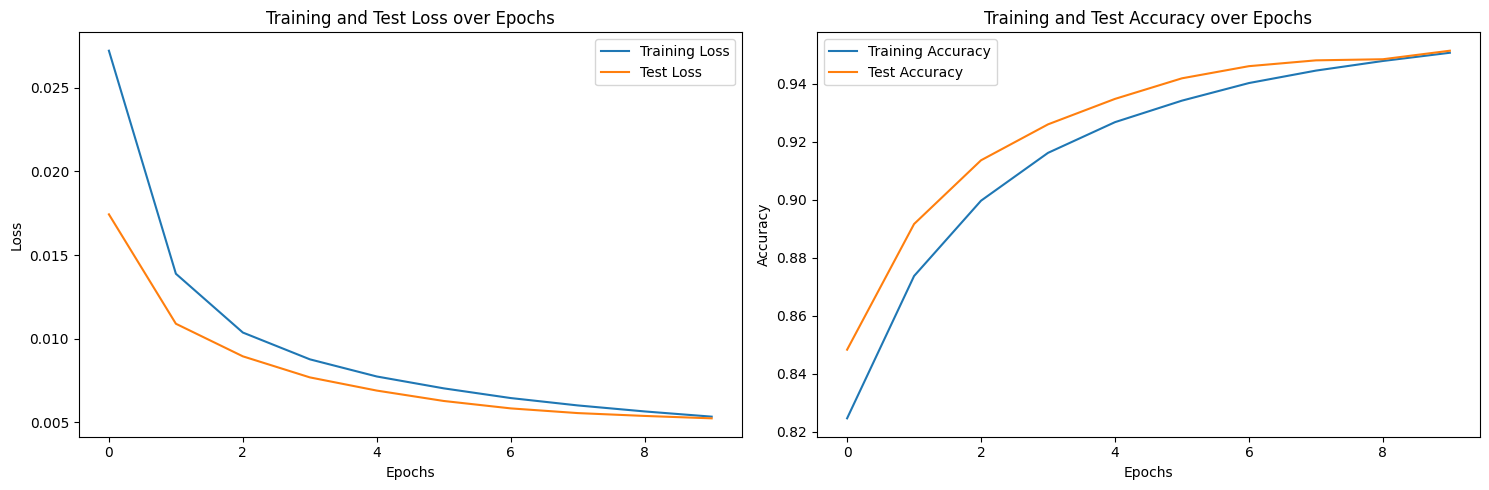

In [100]:
plot_l_a(train_loss,test_loss,train_accuracy,test_accuracy)

In [56]:
#s="hello my name is jake and i am from France"
for j in range (1,10):
    s=pad_seq(x_test.iloc[j],100,"<PAD>")
    s=torch.tensor(our_vocab.lookup_indices(s), dtype=torch.long).unsqueeze(0).to(device) 
    out=our_lstm_model(s)
    out=torch.argmax(torch.softmax(out,dim=-1),dim=-1).squeeze()
    out=out.cpu().detach().numpy()
    f=[]
    for i in out: 
        for k,v in lapels.items(): 
            if i==v :
                f.append(k)
                break

    
    print(f[:len(x_test.iloc[j])])
    t=[]
    for i in y_test.iloc[j]: 
        for k,v in lapels.items(): 
            if i==v :
                t.append(k)
                break
    print(t)

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-org', 'I-org', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-per', 'I-per', 'O', 'B-gpe', 'B-per', 'I-per', 'I-per', 'O', 'O', 'O', 'O', 'B-gpe', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-per', 'I-per', 'O', 'B-gpe', 'B-per', 'I-per', 'I-per', 'O', 'O', 'B-org', 'O', 'B-org', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
['O', 'O', 'O', 'O', 'B-geo', 'O', 'O', 'O', 'O', 'O', 'O', 'B-geo

In [122]:
def single_s_p(s):
    lll=len(s.split())
    s=pad_seq(s.split(),100,"<PAD>")
    s=torch.tensor(our_vocab.lookup_indices(s), dtype=torch.long).unsqueeze(0).to(device) 
    out=our_lstm_model(s)
    out=torch.argmax(torch.softmax(out,dim=-1),dim=-1).squeeze()
    out=out.cpu().detach().numpy()
    f=[]
    for i in out: 
        for k,v in lapels.items(): 
            if i==v :
                f.append(k)
                break
    
    
    return f[:lll]

In [123]:
s="hello my Name is Alex in May and i am from France and Egypt"
print(single_s_p(s))
s="hello my Name is Alex in May and i am from France and Egypt"

['O', 'O', 'O', 'O', 'O', 'O', 'B-tim', 'O', 'O', 'O', 'O', 'B-geo', 'O', 'B-geo']


In [125]:
for i , j in zip(s.split(),single_s_p(s)): 
    print(i,"===",j)


hello === O
my === O
Name === O
is === O
Alex === O
in === O
May === B-tim
and === O
i === O
am === O
from === O
France === B-geo
and === O
Egypt === B-geo


In [108]:
lapels 

{'O': 0,
 'B-geo': 1,
 'B-gpe': 2,
 'B-per': 3,
 'I-geo': 4,
 'B-org': 5,
 'I-org': 6,
 'B-tim': 7,
 'I-per': 8,
 'I-tim': 9}

In [109]:
print(all_s[0],all_l[0])

['Thousands', 'of', 'demonstrators', 'have', 'marched', 'through', 'London', 'to', 'protest', 'the', 'war', 'in', 'Iraq', 'and', 'demand', 'the', 'withdrawal', 'of', 'British', 'troops', 'from', 'that', 'country', '.'] [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]


In [110]:
def evaluation_test():
    
    our_lstm_model.eval()
    with torch.inference_mode(): 
    
        pred_l=[]
        true_l=[]
        for x_test_batch , y_test_batch in our_test_data_loader : 
            x_test_batch=x_test_batch.to(device)
            y_test_batch=y_test_batch.to(device)
        
            y_test_pred=our_lstm_model(x_test_batch)
    
            
            y_test_pred=torch.argmax(torch.softmax(y_test_pred,dim=-1),dim=-1).squeeze().flatten().cpu().detach().numpy()
    
            
            y_test_batch=y_test_batch.flatten().cpu().detach().numpy()
    
            pred_l.extend(y_test_pred)
            true_l.extend(y_test_batch)
    
    pred_f=[]
    true_f=[]
    for true_label, pred_label in zip(true_l, pred_l):
        if true_label != -100:
            true_f.append(true_label)
            pred_f.append(pred_label)

    return true_f,pred_f
    


In [111]:
true_f,pred_f=evaluation_test()

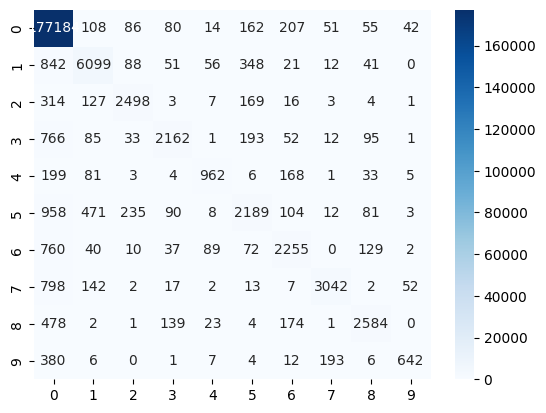

In [114]:
cm=confusion_matrix(true_f,pred_f) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [115]:
print(classification_report(true_f,pred_f))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    177989
           1       0.85      0.81      0.83      7558
           2       0.85      0.80      0.82      3142
           3       0.84      0.64      0.72      3400
           4       0.82      0.66      0.73      1462
           5       0.69      0.53      0.60      4151
           6       0.75      0.66      0.70      3394
           7       0.91      0.75      0.82      4077
           8       0.85      0.76      0.80      3406
           9       0.86      0.51      0.64      1251

    accuracy                           0.95    209830
   macro avg       0.84      0.71      0.77    209830
weighted avg       0.95      0.95      0.95    209830



In [73]:
len(pred_l),len(true_l)

(959200, 959200)

In [74]:
pred_l[99],true_l[99]

(0, -100)

In [76]:
len(pred_f),len(true_f)

(209830, 209830)

In [77]:
pred_f[99],true_f[99]

(1, 1)

In [79]:
type(pred_f[1])

numpy.int64